# Load & Info

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
train_merge = pd.read_csv('../data/train_merge.csv')

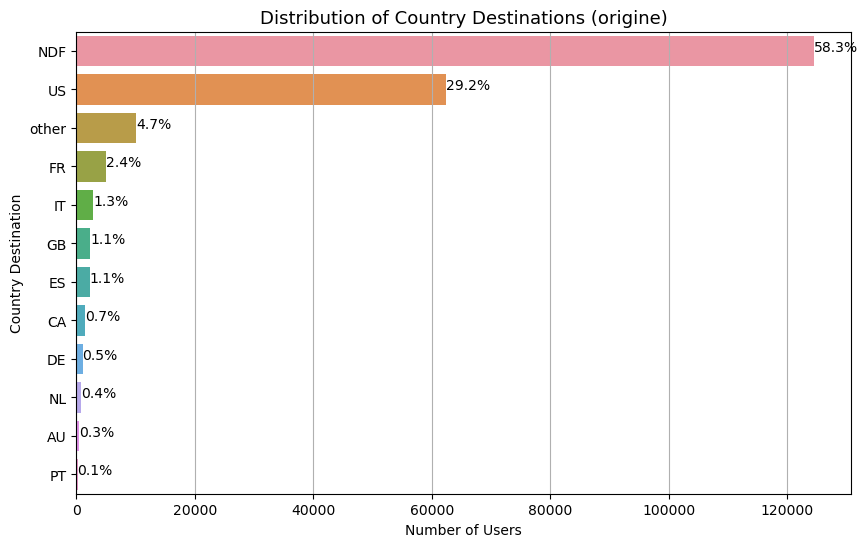

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

train_users_2 = pd.read_csv('../data/train_users_2.csv')

# Create a count plot
sns.countplot(y='country_destination', data=train_users_2, order=train_users_2['country_destination'].value_counts().index)

plt.title("Distribution of Country Destinations (origine)", size=13)
plt.xlabel("Number of Users")
plt.ylabel("Country Destination")
plt.grid(axis='x')  # Add grid lines to the x-axis for better readability

# Calculate and display the percentage labels on each bar
total = len(train_users_2)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02  # Adjust the position of the label
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y))

plt.show()

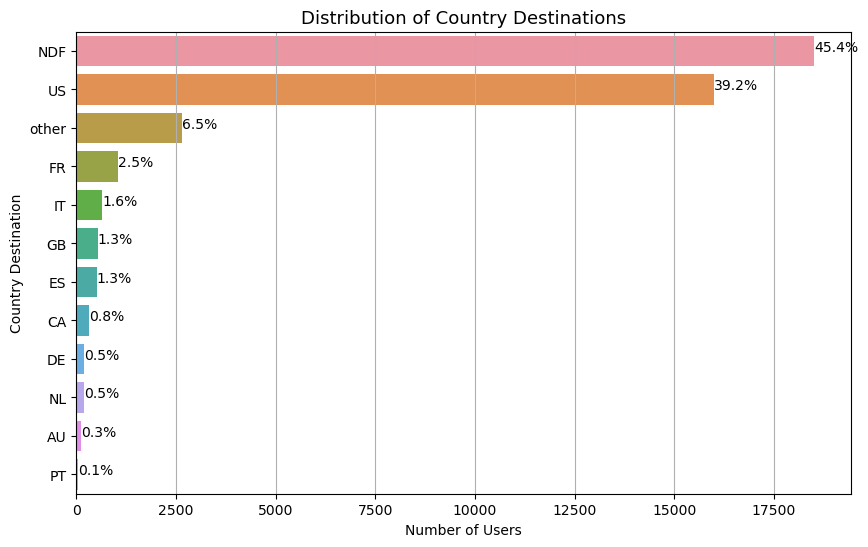

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Create a count plot
sns.countplot(y='country_destination', data=train_merge, order=train_merge['country_destination'].value_counts().index)

plt.title("Distribution of Country Destinations", size=13)
plt.xlabel("Number of Users")
plt.ylabel("Country Destination")
plt.grid(axis='x')  # Add grid lines to the x-axis for better readability

# Calculate and display the percentage labels on each bar
total = len(train_merge)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02  # Adjust the position of the label
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y))

plt.show()

In [227]:
train_merge.columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'most_frequent_action',
       'most_frequent_action_type', 'most_frequent_action_detail',
       'most_frequent_device_type', 'most_frequent_secs_elapsed'],
      dtype='object')

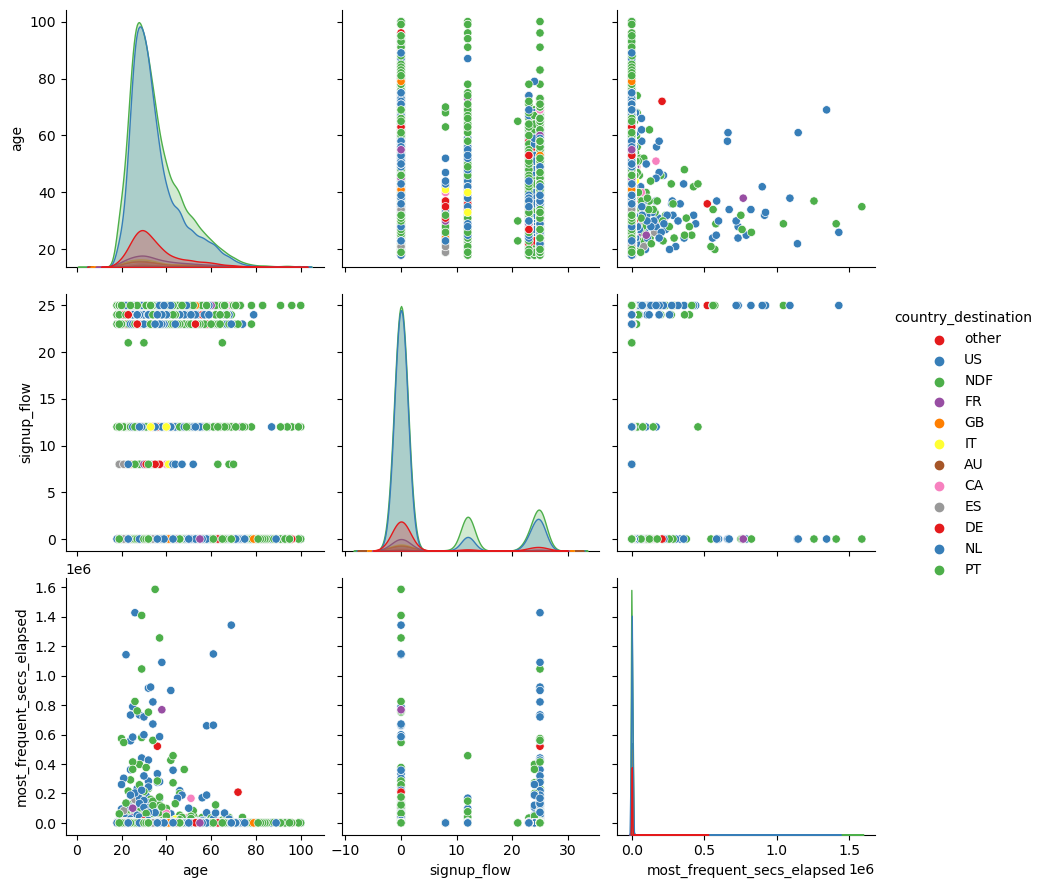

In [184]:
sns.pairplot(
    train_merge[['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'most_frequent_action','most_frequent_action_type','most_frequent_action_detail','most_frequent_device_type','most_frequent_secs_elapsed']],
    hue = "country_destination",
    height = 3,
    palette = "Set1")

C:\Users\ayoub\AppData\Local\Temp\ipykernel_16132\46955923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_merge.corr(), annot= True)


<Axes: >

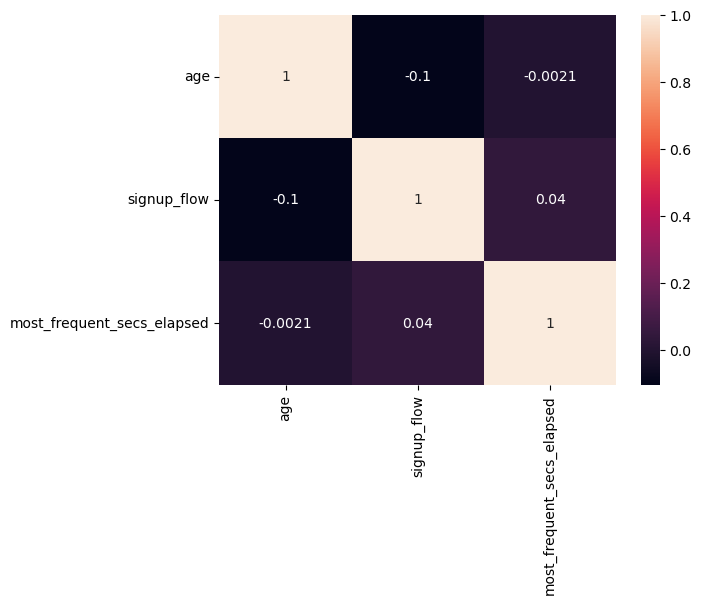

In [185]:
sns.heatmap(train_merge.corr(), annot= True)

# Type

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
train_merge['gender'] = label_encoder.fit_transform(train_merge['gender'])
train_merge['signup_method'] = label_encoder.fit_transform(train_merge['signup_method'])
train_merge['language'] = label_encoder.fit_transform(train_merge['language'])
train_merge['affiliate_channel'] = label_encoder.fit_transform(train_merge['affiliate_channel'])
train_merge['affiliate_provider'] = label_encoder.fit_transform(train_merge['affiliate_provider'])
train_merge['first_affiliate_tracked'] = label_encoder.fit_transform(train_merge['first_affiliate_tracked'])
train_merge['signup_app'] = label_encoder.fit_transform(train_merge['signup_app'])
train_merge['first_device_type'] = label_encoder.fit_transform(train_merge['first_device_type'])
train_merge['first_browser'] = label_encoder.fit_transform(train_merge['first_browser'])

train_merge['most_frequent_action'] = label_encoder.fit_transform(train_merge['most_frequent_action'])
train_merge['most_frequent_action_type'] = label_encoder.fit_transform(train_merge['most_frequent_action_type'])
train_merge['most_frequent_action_detail'] = label_encoder.fit_transform(train_merge['most_frequent_action_detail'])
train_merge['most_frequent_device_type'] = label_encoder.fit_transform(train_merge['most_frequent_device_type'])

train_merge['affiliate_provider'] = label_encoder.fit_transform(train_merge['affiliate_provider'])
train_merge['first_affiliate_tracked'] = label_encoder.fit_transform(train_merge['first_affiliate_tracked'])

# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [187]:
train_merge['date_account_created'] = pd.to_datetime(train_merge['date_account_created'])
train_merge['timestamp_first_active'] = pd.to_datetime(train_merge['timestamp_first_active'])
train_merge['date_first_booking'] = pd.to_datetime(train_merge['date_first_booking'])

In [188]:
train_merge.dtypes

date_account_created           datetime64[ns]
timestamp_first_active         datetime64[ns]
date_first_booking             datetime64[ns]
gender                                  int32
age                                     int64
signup_method                           int32
signup_flow                             int64
language                                int32
affiliate_channel                       int32
affiliate_provider                      int64
first_affiliate_tracked                 int64
signup_app                              int32
first_device_type                       int32
first_browser                           int32
country_destination                    object
most_frequent_action                    int32
most_frequent_action_type               int32
most_frequent_action_detail             int32
most_frequent_device_type               int32
most_frequent_secs_elapsed            float64
dtype: object

In [189]:
train_merge = train_merge.drop(['date_account_created','timestamp_first_active','date_first_booking'], axis=1)

In [190]:
train_merge.to_csv('../data/train_merge_Num.csv',index=False)

# Data Preprocessing

In [191]:
y = train_merge['country_destination']

X = train_merge.drop(columns=['country_destination'])

In [192]:
y

0        other
1           US
2        other
3          NDF
4           US
         ...  
40790       ES
40791       US
40792       US
40793      NDF
40794      NDF
Name: country_destination, Length: 40795, dtype: object

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 16)

In [194]:
print(X_train.dtypes)

gender                           int32
age                              int64
signup_method                    int32
signup_flow                      int64
language                         int32
affiliate_channel                int32
affiliate_provider               int64
first_affiliate_tracked          int64
signup_app                       int32
first_device_type                int32
first_browser                    int32
most_frequent_action             int32
most_frequent_action_type        int32
most_frequent_action_detail      int32
most_frequent_device_type        int32
most_frequent_secs_elapsed     float64
dtype: object


In [195]:
print(y_train.dtypes)

object


# selector1

In [196]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k=100)
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [197]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

## selector2

We need to convert "country_destination" to int

In [198]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [199]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k='all')
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'most_frequent_action', 'most_frequent_action_type',
       'most_frequent_action_detail', 'most_frequent_device_type',
       'most_frequent_secs_elapsed'],
      dtype='object')


# Selected

In [200]:
selected_feature_names

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'most_frequent_action', 'most_frequent_action_type',
       'most_frequent_action_detail', 'most_frequent_device_type',
       'most_frequent_secs_elapsed'],
      dtype='object')

In [201]:
X = X[selected_feature_names]

In [202]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 16)

# Fiting

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# Accuracy

In [204]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}") 

Accuracy: 0.47


### Compare
0.4678882215957838 : all

0.5371369040323569 : 10

0.5383625444294644 : 8

0.5386076725088859 : 6

0.5387302365485966 : 5

0.5387302365485966 : 4  

0.5392204927074397 : 3

0.539281774727295 : 2

0.539281774727295 : 1

# Predict

In [205]:
X.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,most_frequent_action,most_frequent_action_type,most_frequent_action_detail,most_frequent_device_type,most_frequent_secs_elapsed
0,2,62,0,0,5,6,7,3,2,6,6,114,3,75,8,2.0
1,1,32,1,0,5,7,7,0,2,7,17,22,4,14,10,0.0
2,0,19,0,0,5,5,7,6,2,3,23,87,3,75,6,37.0
3,2,25,0,0,5,2,3,6,2,3,6,114,2,75,6,149.0
4,1,32,1,0,5,2,3,6,2,7,17,22,6,0,11,387.0


In [206]:
y

0        other
1           US
2        other
3          NDF
4           US
         ...  
40790       ES
40791       US
40792       US
40793      NDF
40794      NDF
Name: country_destination, Length: 40795, dtype: object

In [207]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Visualize

In [208]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[   0    0    0    0    0    0    0   32    0    0   10    0]
 [   0    0    0    0    0    0    0   88    0    0   34    0]
 [   0    0    0    0    0    0    0   59    0    0   25    0]
 [   0    0    0    0    0    0    0  145    0    0   54    0]
 [   0    0    0    0    0    0    0  312    0    0   93    0]
 [   0    0    0    0    0    0    0  151    0    0   52    0]
 [   0    0    0    0    0    0    0  186    0    0   57    0]
 [   0    0    0    0    0    0    0 6015    0    0 1414    0]
 [   0    0    0    0    0    0    0   61    0    0   18    0]
 [   0    0    0    0    0    0    0   12    0    0    4    0]
 [   0    0    0    0    0    0    0 4883    0    0 1620    0]
 [   0    0    0    0    0    0    0  758    0    0  235    0]]


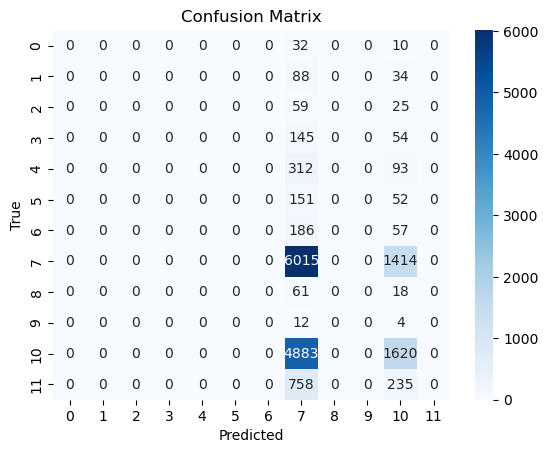

In [209]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Submission

In [210]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_users.csv")
most_frequent_actions = pd.read_csv("../data/most_frequent_actions.csv")

# Merging
test_data = test_data.merge(most_frequent_actions, left_on='id', right_on='user_id', how='inner')

# Cleaning
test_data = test_data[selected_feature_names]

In [211]:
test_data

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,most_frequent_action,most_frequent_action_type,most_frequent_action_detail,most_frequent_device_type,most_frequent_secs_elapsed
0,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,search,click,view_search_results,-unknown-,79.0
1,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,dashboard,view,dashboard,-unknown-,95.0
2,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,search_results,click,view_search_results,Windows Desktop,768.0
3,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,personalize,data,wishlist_content_update,Windows Desktop,5.0
4,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,requested,view,p5,Mac Desktop,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61663,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,update,view,update_listing,Windows Desktop,1.0
61664,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,show,view,p3,Android Phone,8.0
61665,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,search_results,click,view_search_results,Windows Desktop,69.0
61666,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,create,data,header_userpic,Mac Desktop,17.0


## Type

In [212]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])
test_data['signup_method'] = label_encoder.fit_transform(test_data['signup_method'])
test_data['language'] = label_encoder.fit_transform(test_data['language'])
test_data['affiliate_channel'] = label_encoder.fit_transform(test_data['affiliate_channel'])
test_data['signup_app'] = label_encoder.fit_transform(test_data['signup_app'])
test_data['first_device_type'] = label_encoder.fit_transform(test_data['first_device_type'])
test_data['first_browser'] = label_encoder.fit_transform(test_data['first_browser'])

test_data['most_frequent_action'] = label_encoder.fit_transform(test_data['most_frequent_action'])
test_data['most_frequent_action_type'] = label_encoder.fit_transform(test_data['most_frequent_action_type'])
test_data['most_frequent_action_detail'] = label_encoder.fit_transform(test_data['most_frequent_action_detail'])
test_data['most_frequent_device_type'] = label_encoder.fit_transform(test_data['most_frequent_device_type'])

test_data['affiliate_provider'] = label_encoder.fit_transform(test_data['affiliate_provider'])
test_data['first_affiliate_tracked'] = label_encoder.fit_transform(test_data['first_affiliate_tracked'])
# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [213]:
# Calculate the mode of the column
mode_value = test_data['age'].value_counts().idxmax()

# Impute missing values with the mode
test_data['age'] = test_data['age'].fillna(mode_value)

In [214]:
#Checking null values
test_data.isnull().sum()

gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser                  0
most_frequent_action           0
most_frequent_action_type      0
most_frequent_action_detail    0
most_frequent_device_type      0
most_frequent_secs_elapsed     0
dtype: int64

In [215]:
test_data = test_data.dropna()

In [216]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data[selected_feature_names])

In [217]:
train_merge['country_destination']

0        other
1           US
2        other
3          NDF
4           US
         ...  
40790       ES
40791       US
40792       US
40793      NDF
40794      NDF
Name: country_destination, Length: 40795, dtype: object

In [218]:
train_merge['country_destination'] = train_merge['country_destination'].astype('category')

# Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=train_merge['country_destination'].cat.categories)

In [219]:
test_data

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,most_frequent_action,most_frequent_action_type,most_frequent_action_detail,most_frequent_device_type,most_frequent_secs_elapsed,predicted_country
0,1,35.0,1,0,6,1,4,6,1,8,17,109,2,81,0,79.0,NDF
1,0,28.0,0,0,6,1,4,6,1,8,17,41,8,22,0,95.0,NDF
2,0,28.0,0,0,6,1,4,0,2,6,5,110,2,81,9,768.0,NDF
3,0,28.0,0,0,6,1,4,0,2,6,11,87,3,83,9,5.0,NDF
4,0,28.0,0,0,6,1,4,6,2,3,23,104,8,50,6,0.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61663,0,31.0,0,0,6,1,4,6,2,6,11,132,8,69,9,1.0,NDF
61664,0,28.0,0,23,14,1,4,6,0,0,0,114,8,48,2,8.0,NDF
61665,0,28.0,0,0,4,1,4,0,2,6,9,110,2,81,9,69.0,NDF
61666,0,28.0,0,0,6,4,8,3,2,3,23,38,3,26,6,17.0,NDF


In [220]:
test_data['predicted_country'].unique()

['NDF', 'US']
Categories (12, object): ['AU', 'CA', 'DE', 'ES', ..., 'NL', 'PT', 'US', 'other']

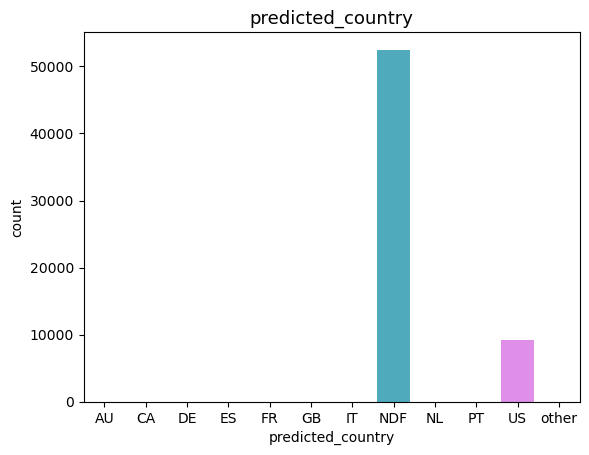

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_country', data=test_data)
plt.title("predicted_country", size=13);

In [222]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)